# System recommendation 

In [ ]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
import re
from dateutil.parser import parse
import string
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_percentage_error
import missingno as msno
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler
import scipy
import researchpy as rp
from matplotlib.offsetbox import AnchoredText
#import pacmap
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
import plotly.express as px
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split 
# Import Halving Grid Search
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV
import xgboost as xgb
from scipy.stats import kurtosis,skew
from numpy import mean,sqrt,square
from scipy.fftpack import fft, fftfreq
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import PredefinedSplit
import pickle
sns.set_style("darkgrid")
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 100

In [ ]:
tag_select=['min_water_3',# 1
 'min_solid percentage_10',# 2
 'HH TPH',# 3
 'max_delta LL charge cell_10',# 4
 'power',# 5
 'rms_delta LL charge cell_3',# 6
 'var_delta HH charge cell_10',# 7
 'max_covelin law_10',# 8
 'LL charge cell_(t-2)',# 9
 'min_granulometry_5',# 10
 'max_bornite law_10', # 11
 'min_charge cell_5',# 12
 'chalcocite law_(t-2)',# 13
 'max_sag power index_5',# 14
 'min_speed_3',# 15
 'var_bornite law_3',# 16
 'var_speed_3',# 17
 'min_pyrite law_10', # 18
 'crusher index_(t-5)', # 19
 'var_power_3',# 20
 'var_chalcocite law_3',# 21
 'var_bornite law_5',# 22
 'var_solid percentage_3',# 23
 'var_speed_10',# 24
 'ball work index_(t-1)',# 25
 'var_chalcocite law_5', # 26
 'var_water_3',# 27
 'chalcopyrite law_(t-5)',# 28
 'var_crusher index_10',# 29
 'var_chalcopyrite law_3',# 30
 'var_granulometry_3',# 31
 'var_delta HH charge cell_3'# 32
 ]

In [ ]:
def pipeline_feature_engineering(df):
      
    df_vars = df.copy()
    
    pipe_df_features=pd.DataFrame()

    pipe_df_features['HH charge cell']=df_vars["HH charge cell"] ##
    pipe_df_features['LL charge cell']=df_vars["LL charge cell"] ##
    pipe_df_features['charge cell']=df_vars["charge cell"] ##

    pipe_df_features["delta HH charge cell"]=pipe_df_features["HH charge cell"]-pipe_df_features["charge cell"] ##
    pipe_df_features["delta LL charge cell"]=pipe_df_features["charge cell"]-pipe_df_features["LL charge cell"] ##

    pipe_df_features["min_water_3"]=df_vars["water"].rolling(window=3).apply(lambda x:np.nanmin(list(x))) # 1
    pipe_df_features["min_solid percentage_10"]=df_vars["solid percentage"].rolling(window=10).apply(lambda x:np.nanmin(list(x))) # 2
    pipe_df_features['HH TPH']=df_vars['HH TPH'] # 3
    pipe_df_features["max_delta LL charge cell_10"]=pipe_df_features["delta LL charge cell"].rolling(window=10).apply(lambda x:np.nanmax(list(x))) # 4
    pipe_df_features['power']=df_vars['power'] # 5
    pipe_df_features["rms_delta LL charge cell_3"]=pipe_df_features["delta LL charge cell"].rolling(window=3).apply(lambda x: sqrt(mean(square(list(x))))) # 6
    pipe_df_features["var_delta HH charge cell_10"]=pipe_df_features["delta HH charge cell"].rolling(window=10).apply(lambda x: np.nanvar(x)) # 7
    pipe_df_features[f"max_covelin law_10"]=df_vars["covelin law"].rolling(window=10).apply(lambda x:np.nanmax(list(x))) # 8
    pipe_df_features[f'LL charge cell_(t-2)'] = pipe_df_features["LL charge cell"].shift(2) # 9
    pipe_df_features[f"min_granulometry_5"]=df_vars["granulometry"].rolling(window=5).apply(lambda x:np.nanmin(list(x))) # 10
    pipe_df_features[f"max_bornite law_10"]=df_vars["bornite law"].rolling(window=10).apply(lambda x:np.nanmax(list(x))) # 11
    pipe_df_features[f"min_charge cell_5"]=pipe_df_features["charge cell"].rolling(window=5).apply(lambda x:np.nanmin(list(x))) # 12
    pipe_df_features[f'chalcocite law_(t-2)'] = df_vars["chalcocite law"].shift(2) # 13
    pipe_df_features[f"max_sag power index_5"]=df_vars["sag power index"].rolling(window=5).apply(lambda x:np.nanmax(list(x))) # 14
    pipe_df_features[f"min_speed_3"]=df_vars["speed"].rolling(window=3).apply(lambda x:np.nanmin(list(x))) # 15
    pipe_df_features[f"var_bornite law_3"]=df_vars["bornite law"].rolling(window=3).apply(lambda x: np.nanvar(x)) # 16
    pipe_df_features[f"var_speed_3"]=df_vars["speed"].rolling(window=3).apply(lambda x: np.nanvar(x)) # 17
    pipe_df_features[f"min_pyrite law_10"]=df_vars["pyrite law"].rolling(window=10).apply(lambda x:np.nanmin(list(x))) # 18
    pipe_df_features[f'crusher index_(t-5)'] = df_vars["crusher index"].shift(5) # 19
    pipe_df_features[f"var_power_3"]=df_vars["power"].rolling(window=3).apply(lambda x: np.nanvar(x)) # 20
    pipe_df_features[f"var_chalcocite law_3"]=df_vars["chalcocite law"].rolling(window=3).apply(lambda x: np.nanvar(x)) # 21
    pipe_df_features[f"var_bornite law_5"]=df_vars["bornite law"].rolling(window=5).apply(lambda x: np.nanvar(x)) # 22
    pipe_df_features[f"var_solid percentage_3"]=df_vars["solid percentage"].rolling(window=3).apply(lambda x: np.nanvar(x)) # 23
    pipe_df_features[f"var_speed_10"]=df_vars["speed"].rolling(window=10).apply(lambda x: np.nanvar(x)) # 24
    pipe_df_features[f"ball work index_(t-1)"] = df_vars["ball work index"].shift(1) # 25
    pipe_df_features[f"var_chalcocite law_5"]=df_vars["chalcocite law"].rolling(window=5).apply(lambda x: np.nanvar(x)) # 26
    pipe_df_features[f"var_water_3"]=df_vars["water"].rolling(window=3).apply(lambda x: np.nanvar(x)) # 27
    pipe_df_features[f'chalcopyrite law_(t-5)'] = df_vars["chalcopyrite law"].shift(5) # 28
    pipe_df_features[f"var_crusher index_10"]=df_vars["crusher index"].rolling(window=10).apply(lambda x: np.nanvar(x)) # 29
    pipe_df_features[f"var_chalcopyrite law_3"]=df_vars["chalcopyrite law"].rolling(window=3).apply(lambda x: np.nanvar(x)) # 30
    pipe_df_features[f"var_granulometry_3"]=df_vars["granulometry"].rolling(window=3).apply(lambda x: np.nanvar(x)) # 31
    pipe_df_features[f"var_delta HH charge cell_3"]=pipe_df_features["delta HH charge cell"].rolling(window=3).apply(lambda x: np.nanvar(x)) # 32
    
    
    return pipe_df_features

In [ ]:
variables_interes=['pyrite law', 'chalcopyrite law',
       'chalcocite law', 'covelin law', 'crusher index', 'sag power index',
       'ball work index', 'bornite law','charge cell', 'speed','HH TPH', 'granulometry','Edad','loss of TPH',"solid percentage","HH charge cell","LL charge cell","TPH",
       #"recommendation base model carl","recommendation base model acn",
       "water","power"]

In [ ]:
# read df full csv
df_features=pd.read_csv('../../../data/processed data/df_feature_engineering_18December2022.csv', parse_dates=['Timestamp'], index_col='Timestamp')#[variables_interes]#["2020":"2021"]
df_features.dropna(inplace=True)
df_features.sort_index(inplace=True)
df_features.shape

# Load pipeline and XGBoost

In [ ]:
# Load
model= xgb.XGBRegressor()
model.load_model("../../../models/model_xgb.bin")

In [ ]:
# Leer pipeline:
pipe= pickle.load(open('../../../models/pipe_xgb.pkl', 'rb'))

# Recommendation base model ACN

In [ ]:
# Se carga clasificador de mineralogia
kmeans = pickle.load(open('..//..//..//models//pickles//Modelo update Accenture//Clasificador_dispatch_n_4.pkl', 'rb'))
#kmeans.feature_names_in_
# Se carga la curva de celda de carga v/s granulometria (dado un subcontexto)
dicK = pickle.load(open('..//..//..//models//pickles//Modelo update Accenture//cc_recommendations_prod.pkl', 'rb'))

# Recomendación 
def recommendationcc(granulometria,edad_sag,cluster):
 
    # Generación del subcontexto
    subcontexto = str(int(edad_sag)) + str(int(cluster))
   
    # Obtención de la recomendación
    consejo=dicK['s'+subcontexto].loc[granulometria]["cc"]
  
    return consejo #pd.DataFrame({"recommendation":list(consejo)})

In [ ]:
# Predict cluster
df_features["cluster"]=kmeans.predict(df_features[['crusher index',
                                              'sag power index',
                                               'ball work index',
                                              'chalcopyrite law',
                                              'pyrite law',
                                              'chalcocite law',
                                              'bornite law',
                                              'covelin law']])

In [ ]:
# Recomendación 
Rec_HH_CC=df_features.apply(lambda row: recommendationcc(
                                              row["granulometry"],
                                            row["Edad"],
                                            row["cluster"]
                                                    ),axis=1)

# Columna de recomendación
df_features["recommendation base model acn"]=Rec_HH_CC

# Recommendation base model Carl

In [ ]:
# Se carga clasificador de mineralogia
kmeans = pickle.load(open('..//..//..//models//pickles//Clasificador_dispatch_n_4.pkl', 'rb'))
#kmeans.feature_names_in_
# Se carga la curva de celda de carga v/s granulometria (dado un subcontexto)
dicK = pickle.load(open('..//..//..//models//pickles//Curvas de celda de carga vs granulometria productivo actualizado.pkl', 'rb'))

# Recomendación 
def recommendationcc(granulometria,edad_sag,cluster):
 
    # Generación del subcontexto
    subcontexto = str(int(edad_sag)) + str(int(cluster))
   
    # Obtención de la recomendación
    consejo=dicK[subcontexto].loc[granulometria]["cc"]
    
    return consejo #pd.DataFrame({"recommendation":list(consejo)})

In [ ]:
# Predict cluster
df_features["cluster"]=kmeans.predict(df_features[['crusher index',
                                              'sag power index',
                                               'ball work index',
                                              'chalcopyrite law',
                                              'pyrite law',
                                              'chalcocite law',
                                              'bornite law',
                                              'covelin law']])

In [ ]:
# Recomendación 
Rec_HH_CC=df_features.apply(lambda row: recommendationcc(
                                              row["granulometry"],
                                            row["Edad"],
                                            row["cluster"]
                                                    ),axis=1)

# Columna de recomendación
df_features["recommendation base model carl"]=Rec_HH_CC

# Data test para recomendación HH CC

In [ ]:
# Test
test=pd.concat([df_features["2020-04"],df_features["2021-09"],df_features["2022"]])
test.head(1)

In [ ]:
# Ytest reg
Ytest=test["TPH"]
Xtest=test.drop(columns=["TPH"])

# recommendation function

In [ ]:
range_hh_cc=np.arange(660,1050,25)
range_hh_cc

In [ ]:
def feature_engineering_recommendation(df):
      
    pipe_df_features=df.copy()
    pipe_df_features["LL charge cell"]=pipe_df_features["HH charge cell"]-80
    pipe_df_features["charge cell"]=(pipe_df_features["HH charge cell"]+pipe_df_features["LL charge cell"])/2
    
    pipe_df_features["delta HH charge cell"]=pipe_df_features["HH charge cell"]-pipe_df_features["charge cell"] ##
    pipe_df_features["delta LL charge cell"]=pipe_df_features["charge cell"]-pipe_df_features["LL charge cell"] ##
    
    pipe_df_features["max_delta LL charge cell_10"]=pipe_df_features["delta LL charge cell"].rolling(window=10).apply(lambda x:np.nanmax(list(x))) ##
    pipe_df_features["rms_delta LL charge cell_3"]=pipe_df_features["delta LL charge cell"].rolling(window=3).apply(lambda x: sqrt(mean(square(list(x))))) ##
    pipe_df_features["var_delta HH charge cell_10"]=pipe_df_features["delta HH charge cell"].rolling(window=10).apply(lambda x: np.nanvar(x)) ##
    pipe_df_features[f'LL charge cell_(t-2)'] = pipe_df_features["LL charge cell"].shift(2) ##
    pipe_df_features[f"min_charge cell_5"]=pipe_df_features["charge cell"].rolling(window=5).apply(lambda x:np.nanmin(list(x))) ##
    pipe_df_features[f"var_delta HH charge cell_3"]=pipe_df_features["delta HH charge cell"].rolling(window=3).apply(lambda x: np.nanvar(x)) ##
    
    return pipe_df_features

In [ ]:
def tph_function(HH_CC,df):

    df_rec=df.copy()
    df_rec["HH charge cell"]=HH_CC
    df_rec_features=feature_engineering_recommendation(df_rec).iloc[[-1]]
    #display(df_rec_features)
    X=pipe.transform(df_rec_features)
    Ypred= model.predict(X)[0]

    return Ypred


In [ ]:
# test 2021
test_time_serie=Xtest["2021"]
test_time_serie["TPH"]=Ytest["2021"]

#features=pipeline_feature_engineering(test_time_serie)

features=test_time_serie
Xtest1=pipe.transform(features)
Ypred= model.predict(Xtest1)

test_time_serie["TPH predict"]=Ypred


# Métricas
print('R2: ',r2_score(test_time_serie["TPH"], test_time_serie["TPH predict"]),'\n','RMSE: ',mean_squared_error(test_time_serie["TPH"], test_time_serie["TPH predict"], squared=False))

test_time_serie.dropna(inplace=True)
data=test_time_serie
data.head(1)

In [ ]:
titulos=tuple(["TPH & HH TPH","speed", "charge cell","solid percentage","granulometry & SPI","water"])
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=titulos,
    #subplot_titles=tuple("TPH y HH TPH,"),
     shared_xaxes=True
    )




fig.add_trace(go.Scatter(x=test_time_serie.index, y=test_time_serie["TPH predict"],
                    mode='lines',
                    name='TPH predict'),row=1, col=1)
fig.add_trace(go.Scatter(x=test_time_serie.index, y=test_time_serie["HH TPH"],
                    mode='lines',
                    name='HH TPH'),row=1, col=1)

fig.add_trace(go.Scatter(x=test_time_serie.index, y=test_time_serie["TPH"],
                    mode='lines',
                    name='TPH'),row=1, col=1)

##
fig.add_trace(go.Scatter(x=test_time_serie.index, y=test_time_serie["HH charge cell"],
                    mode='lines',
                    name='HH charge cell'),row=2, col=1)

fig.add_trace(go.Scatter(x=test_time_serie.index, y=test_time_serie['recommendation base model acn'],
                    mode='lines',
                    name='recommendation base model acn'),row=2, col=1)

fig.add_trace(go.Scatter(x=test_time_serie.index, y=test_time_serie['recommendation base model carl'],
                    mode='lines',
                    name='recommendation base model carl'),row=2, col=1)


fig.add_trace(go.Scatter(x=test_time_serie.index, y=test_time_serie["LL charge cell"],
                    mode='lines',
                    name='LL charge cell'),row=2, col=1)

fig.add_trace(go.Scatter(x=test_time_serie.index, y=test_time_serie["charge cell"],
                    mode='lines',
                    name='charge cell'),row=2, col=1)   

fig.add_trace(go.Scatter(x=test_time_serie.index, y=test_time_serie['granulometry'], ##FF6511
                    mode='lines',
                    name='granulometry',line=dict(width=3,),legendgroup = '1'),row=3, col=1)  


fig.add_trace(go.Scatter(x=test_time_serie.index, y=test_time_serie['sag power index'], ##FF6511
                    mode='lines',
                    name="sag power index",line=dict(width=3, ),legendgroup = '1'),row=3, col=1)  



fig.add_trace(go.Scatter(x=test_time_serie.index, y=test_time_serie['speed'], ##FF6511
                    mode='lines',
                    name="speed",line=dict(width=3, ),legendgroup = '1'),row=1, col=2)  

fig.add_trace(go.Scatter(x=test_time_serie.index, y=test_time_serie['solid percentage'], ##FF6511
                    mode='lines',
                    name='solid percentage',line=dict(width=3, ),legendgroup = '1'),row=2, col=2)  

fig.add_trace(go.Scatter(x=test_time_serie.index, y=test_time_serie['water'], ##FF6511
                    mode='lines',
                    name='water',line=dict(width=3, ),legendgroup = '1'),row=3, col=2)  
#for i in range(1,6):
#   for j in range(1,4):
#        fig.update_xaxes(tickformat="%H:%M",row=i, col=j)


fig.update_layout(height=1000, width=1700, title_text="Temporal signal analysis")
fig.update_layout(hovermode="x unified")
#

fig.show()

In [ ]:
data1=data.loc['2021-09-15 03:00:00':'2021-09-15 03:20:00']#[tag_select]
print(data1.shape)
data1.head()

In [ ]:
def optimum_recommendation(df,range_hh_cc):
    list_TPH=np.array([tph_function(i,df) for i in range_hh_cc])
    
    index_max=np.argmax(list_TPH)
    rec_hh_cc=range_hh_cc[index_max]
    tph_opt=list_TPH[index_max]
    
    df_tph=pd.DataFrame({"TPH":list_TPH,"HH CC":range_hh_cc})
    
    fig = go.Figure()
#
    fig.add_trace(go.Scatter(x=df_tph["HH CC"], y=df_tph["TPH"],
                        mode='lines+markers',
                        name='TPH'))
#
    fig.update_layout(height=500, width=1200, title_text="TPH vs HH charge cell" ,xaxis_title="HH charge cell",
        yaxis_title="TPH")   
#
    fig.update_layout(hovermode="x unified")                
#
    fig.show()

    return rec_hh_cc,tph_opt

In [132]:
def grinding_curve_minute(df,range_hh_cc):
    list_TPH=np.array([tph_function(i,df) for i in range_hh_cc])
    
    df_tph=pd.DataFrame({"TPH":list_TPH,"HH CC":range_hh_cc})
    
    #fig = go.Figure()
##
    #fig.add_trace(go.Scatter(x=df_tph["HH CC"], y=df_tph["TPH"],
    #                    mode='lines+markers',
    #                    name='TPH'))
##
    #fig.update_layout(height=500, width=1200, title_text="TPH vs HH charge cell" ,xaxis_title="HH charge cell",
    #    yaxis_title="TPH")   
##
    #fig.update_layout(hovermode="x unified")                
##
    #fig.show()

    return list_TPH

In [133]:
inicio_recomendacion=pd.Timestamp('2021-09-15 03:00:00')
fin_recomendacion='2021-09-15 03:30:00'

In [134]:
init_df=inicio_recomendacion-timedelta(minutes=10)
end_df=fin_recomendacion

In [135]:
timestep = 1
time_freq = str(timestep) + 'min'
timestamps = pd.DataFrame(pd.date_range(inicio_recomendacion, fin_recomendacion, freq=time_freq))[0].to_list()
timestamps

[Timestamp('2021-09-15 03:00:00'),
 Timestamp('2021-09-15 03:01:00'),
 Timestamp('2021-09-15 03:02:00'),
 Timestamp('2021-09-15 03:03:00'),
 Timestamp('2021-09-15 03:04:00'),
 Timestamp('2021-09-15 03:05:00'),
 Timestamp('2021-09-15 03:06:00'),
 Timestamp('2021-09-15 03:07:00'),
 Timestamp('2021-09-15 03:08:00'),
 Timestamp('2021-09-15 03:09:00'),
 Timestamp('2021-09-15 03:10:00'),
 Timestamp('2021-09-15 03:11:00'),
 Timestamp('2021-09-15 03:12:00'),
 Timestamp('2021-09-15 03:13:00'),
 Timestamp('2021-09-15 03:14:00'),
 Timestamp('2021-09-15 03:15:00'),
 Timestamp('2021-09-15 03:16:00'),
 Timestamp('2021-09-15 03:17:00'),
 Timestamp('2021-09-15 03:18:00'),
 Timestamp('2021-09-15 03:19:00'),
 Timestamp('2021-09-15 03:20:00'),
 Timestamp('2021-09-15 03:21:00'),
 Timestamp('2021-09-15 03:22:00'),
 Timestamp('2021-09-15 03:23:00'),
 Timestamp('2021-09-15 03:24:00'),
 Timestamp('2021-09-15 03:25:00'),
 Timestamp('2021-09-15 03:26:00'),
 Timestamp('2021-09-15 03:27:00'),
 Timestamp('2021-09-

In [136]:

data1=data.loc[init_df:fin_recomendacion]#[tag_select]
print(data1.shape)
data1.head()

(41, 407)


,pyrite law,chalcopyrite law,chalcocite law,covelin law,crusher index,sag power index,ball work index,bornite law,charge cell,water,speed,HH TPH,granulometry,Edad,loss of TPH,power,solid percentage,HH charge cell,LL charge cell,delta HH TPH,delta HH charge cell,delta LL charge cell,mean_pyrite law_10,max_pyrite law_10,min_pyrite law_10,rms_pyrite law_10,var_pyrite law_10,mean_pyrite law_5,max_pyrite law_5,min_pyrite law_5,rms_pyrite law_5,var_pyrite law_5,mean_pyrite law_3,max_pyrite law_3,min_pyrite law_3,rms_pyrite law_3,var_pyrite law_3,mean_chalcopyrite law_10,max_chalcopyrite law_10,min_chalcopyrite law_10,rms_chalcopyrite law_10,var_chalcopyrite law_10,mean_chalcopyrite law_5,max_chalcopyrite law_5,min_chalcopyrite law_5,rms_chalcopyrite law_5,var_chalcopyrite law_5,mean_chalcopyrite law_3,max_chalcopyrite law_3,min_chalcopyrite law_3,rms_chalcopyrite law_3,var_chalcopyrite law_3,mean_chalcocite law_10,max_chalcocite law_10,min_chalcocite law_10,rms_chalcocite law_10,var_chalcocite law_10,mean_chalcocite law_5,max_chalcocite law_5,min_chalcocite law_5,rms_chalcocite law_5,var_chalcocite law_5,mean_chalcocite law_3,max_chalcocite law_3,min_chalcocite law_3,rms_chalcocite law_3,var_chalcocite law_3,mean_covelin law_10,max_covelin law_10,min_covelin law_10,rms_covelin law_10,var_covelin law_10,mean_covelin law_5,max_covelin law_5,min_covelin law_5,rms_covelin law_5,var_covelin law_5,mean_covelin law_3,max_covelin law_3,min_covelin law_3,rms_covelin law_3,var_covelin law_3,mean_crusher index_10,max_crusher index_10,min_crusher index_10,rms_crusher index_10,var_crusher index_10,mean_crusher index_5,max_crusher index_5,min_crusher index_5,rms_crusher index_5,var_crusher index_5,mean_crusher index_3,max_crusher index_3,min_crusher index_3,rms_crusher index_3,var_crusher index_3,mean_sag power index_10,max_sag power index_10,min_sag power index_10,rms_sag power index_10,var_sag power index_10,mean_sag power index_5,max_sag power index_5,min_sag power index_5,rms_sag power index_5,var_sag power index_5,mean_sag power index_3,max_sag power index_3,min_sag power index_3,rms_sag power index_3,var_sag power index_3,mean_ball work index_10,max_ball work index_10,min_ball work index_10,rms_ball work index_10,var_ball work index_10,mean_ball work index_5,max_ball work index_5,min_ball work index_5,rms_ball work index_5,var_ball work index_5,mean_ball work index_3,max_ball work index_3,min_ball work index_3,rms_ball work index_3,var_ball work index_3,mean_bornite law_10,max_bornite law_10,min_bornite law_10,rms_bornite law_10,var_bornite law_10,mean_bornite law_5,max_bornite law_5,min_bornite law_5,rms_bornite law_5,var_bornite law_5,mean_bornite law_3,max_bornite law_3,min_bornite law_3,rms_bornite law_3,var_bornite law_3,mean_charge cell_10,max_charge cell_10,min_charge cell_10,rms_charge cell_10,var_charge cell_10,mean_charge cell_5,max_charge cell_5,min_charge cell_5,rms_charge cell_5,var_charge cell_5,mean_charge cell_3,max_charge cell_3,min_charge cell_3,rms_charge cell_3,var_charge cell_3,mean_water_10,max_water_10,min_water_10,rms_water_10,var_water_10,mean_water_5,max_water_5,min_water_5,rms_water_5,var_water_5,mean_water_3,max_water_3,min_water_3,rms_water_3,var_water_3,mean_speed_10,max_speed_10,min_speed_10,rms_speed_10,var_speed_10,mean_speed_5,max_speed_5,min_speed_5,rms_speed_5,var_speed_5,mean_speed_3,max_speed_3,min_speed_3,rms_speed_3,var_speed_3,mean_granulometry_10,max_granulometry_10,min_granulometry_10,rms_granulometry_10,var_granulometry_10,mean_granulometry_5,max_granulometry_5,min_granulometry_5,rms_granulometry_5,var_granulometry_5,mean_granulometry_3,max_granulometry_3,min_granulometry_3,rms_granulometry_3,var_granulometry_3,mean_power_10,max_power_10,min_power_10,rms_power_10,var_power_10,mean_power_5,max_power_5,min_power_5,rms_power_5,var_power_5,mean_power_3,max_power_3,min_power_3,rms_power_3,var_power_3,mean_solid percentage_10,max_solid percentage_10,min_solid percentage_10,rms_solid percentage_10,var_so

In [ ]:
index_max=np.argmax(list_TPH)
rec_hh_cc=range_hh_cc[index_max]
tph_opt=list_TPH[index_max]

0
2021-09-15 03:00:00


,TPH_mean
660,NaN
685,NaN
710,NaN
735,NaN
760,NaN
785,NaN
810,NaN
835,NaN
860,NaN
885,NaN


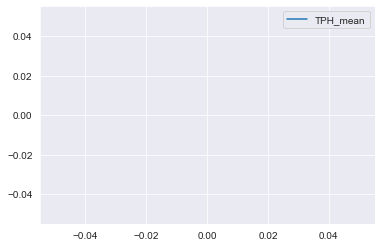

1
2021-09-15 03:01:00


,0,TPH_mean
660,4493.231445,4493.231445
685,4493.231445,4493.231445
710,4493.231445,4493.231445
735,4490.886230,4490.886230
760,4490.886230,4490.886230
785,4485.333008,4485.333008
810,4485.333008,4485.333008
835,4486.504395,4486.504395
860,4486.504395,4486.504395
885,4491.474609,4491.474609


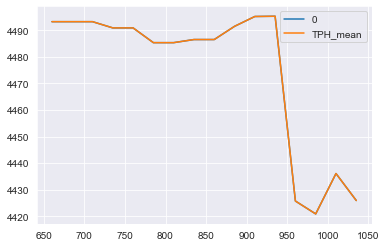

2
2021-09-15 03:02:00


,0,1,TPH_mean
660,4493.231445,4493.231445,4493.231445
685,4493.231445,4493.231445,4493.231445
710,4493.231445,4493.231445,4493.231445
735,4490.886230,4490.886230,4490.886230
760,4490.886230,4490.886230,4490.886230
785,4485.333008,4485.333008,4485.333008
810,4485.333008,4485.333008,4485.333008
835,4486.504395,4486.504395,4486.504395
860,4486.504395,4486.504395,4486.504395
885,4491.474609,4491.474609,4491.474609


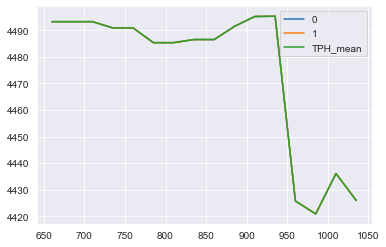

3
2021-09-15 03:03:00


,0,1,2,TPH_mean
660,4493.231445,4493.231445,4487.864258,4491.442383
685,4493.231445,4493.231445,4487.864258,4491.442383
710,4493.231445,4493.231445,4487.864258,4491.442383
735,4490.886230,4490.886230,4485.394531,4489.055664
760,4490.886230,4490.886230,4485.394531,4489.055664
785,4485.333008,4485.333008,4479.841309,4483.502441
810,4485.333008,4485.333008,4479.841309,4483.502441
835,4486.504395,4486.504395,4479.841309,4484.283203
860,4486.504395,4486.504395,4479.841309,4484.283203
885,4491.474609,4491.474609,4480.378418,4487.775879


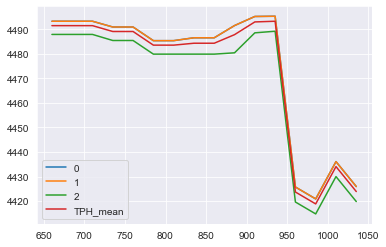

4
2021-09-15 03:04:00


,0,1,2,3,TPH_mean
660,4493.231445,4493.231445,4487.864258,4484.775391,4489.775391
685,4493.231445,4493.231445,4487.864258,4484.775391,4489.775391
710,4493.231445,4493.231445,4487.864258,4484.775391,4489.775391
735,4490.886230,4490.886230,4485.394531,4482.305664,4487.368164
760,4490.886230,4490.886230,4485.394531,4482.305664,4487.368164
785,4485.333008,4485.333008,4479.841309,4476.752441,4481.814941
810,4485.333008,4485.333008,4479.841309,4476.752441,4481.814941
835,4486.504395,4486.504395,4479.841309,4476.752441,4482.400391
860,4486.504395,4486.504395,4479.841309,4476.752441,4482.400391
885,4491.474609,4491.474609,4480.378418,4466.732422,4482.515137


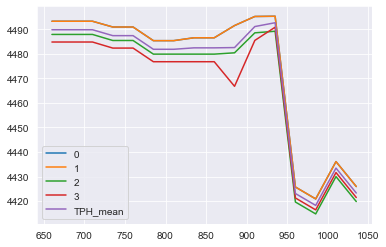

5
2021-09-15 03:05:00


,0,1,2,3,4,TPH_mean
660,4493.231445,4493.231445,4487.864258,4484.775391,4487.086426,4489.237305
685,4493.231445,4493.231445,4487.864258,4484.775391,4487.086426,4489.237305
710,4493.231445,4493.231445,4487.864258,4484.775391,4487.086426,4489.237305
735,4490.886230,4490.886230,4485.394531,4482.305664,4484.616699,4486.817871
760,4490.886230,4490.886230,4485.394531,4482.305664,4484.616699,4486.817871
785,4485.333008,4485.333008,4479.841309,4476.752441,4479.063477,4481.264648
810,4485.333008,4485.333008,4479.841309,4476.752441,4479.063477,4481.264648
835,4486.504395,4486.504395,4479.841309,4476.752441,4479.063477,4481.732910
860,4486.504395,4486.504395,4479.841309,4476.752441,4479.063477,4481.732910
885,4491.474609,4491.474609,4480.378418,4466.732422,4479.600586,4481.932129


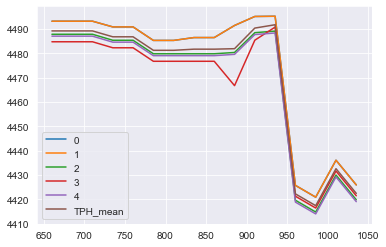

6
2021-09-15 03:06:00


,0,1,2,3,4,5,TPH_mean
660,4493.231445,4493.231445,4487.864258,4484.775391,4487.086426,4489.605469,4489.298828
685,4493.231445,4493.231445,4487.864258,4484.775391,4487.086426,4489.605469,4489.298828
710,4493.231445,4493.231445,4487.864258,4484.775391,4487.086426,4489.605469,4489.298828
735,4490.886230,4490.886230,4485.394531,4482.305664,4484.616699,4487.135742,4486.871094
760,4490.886230,4490.886230,4485.394531,4482.305664,4484.616699,4487.135742,4486.871094
785,4485.333008,4485.333008,4479.841309,4476.752441,4479.063477,4481.582520,4481.317871
810,4485.333008,4485.333008,4479.841309,4476.752441,4479.063477,4481.582520,4481.317871
835,4486.504395,4486.504395,4479.841309,4476.752441,4479.063477,4481.582520,4481.707520
860,4486.504395,4486.504395,4479.841309,4476.752441,4479.063477,4481.582520,4481.707520
885,4491.474609,4491.474609,4480.378418,4466.732422,4479.600586,4482.119629,4481.963379


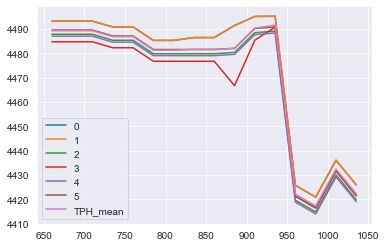

7
2021-09-15 03:07:00


,0,1,2,3,4,5,6,TPH_mean
660,4493.231445,4493.231445,4487.864258,4484.775391,4487.086426,4489.605469,4488.750488,4489.220215
685,4493.231445,4493.231445,4487.864258,4484.775391,4487.086426,4489.605469,4488.750488,4489.220215
710,4493.231445,4493.231445,4487.864258,4484.775391,4487.086426,4489.605469,4488.750488,4489.220215
735,4490.886230,4490.886230,4485.394531,4482.305664,4484.616699,4487.135742,4486.280762,4486.786621
760,4490.886230,4490.886230,4485.394531,4482.305664,4484.616699,4487.135742,4486.280762,4486.786621
785,4485.333008,4485.333008,4479.841309,4476.752441,4479.063477,4481.582520,4480.727539,4481.233398
810,4485.333008,4485.333008,4479.841309,4476.752441,4479.063477,4481.582520,4480.727539,4481.233398
835,4486.504395,4486.504395,4479.841309,4476.752441,4479.063477,4481.582520,4480.727539,4481.567383
860,4486.504395,4486.504395,4479.841309,4476.752441,4479.063477,4481.582520,4480.727539,4481.567383
885,4491.474609,4491.474609,4480.378418,4466.732422,4479.600586,4482.119629,4481.264648,4481.863281


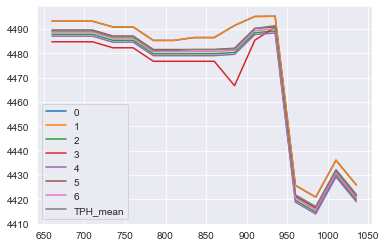

8
2021-09-15 03:08:00


,0,1,2,3,4,5,6,7,TPH_mean
660,4493.231445,4493.231445,4487.864258,4484.775391,4487.086426,4489.605469,4488.750488,4488.750488,4489.161621
685,4493.231445,4493.231445,4487.864258,4484.775391,4487.086426,4489.605469,4488.750488,4488.750488,4489.161621
710,4493.231445,4493.231445,4487.864258,4484.775391,4487.086426,4489.605469,4488.750488,4488.750488,4489.161621
735,4490.886230,4490.886230,4485.394531,4482.305664,4484.616699,4487.135742,4486.280762,4486.280762,4486.723633
760,4490.886230,4490.886230,4485.394531,4482.305664,4484.616699,4487.135742,4486.280762,4486.280762,4486.723633
785,4485.333008,4485.333008,4479.841309,4476.752441,4479.063477,4481.582520,4480.727539,4480.727539,4481.169922
810,4485.333008,4485.333008,4479.841309,4476.752441,4479.063477,4481.582520,4480.727539,4480.727539,4481.169922
835,4486.504395,4486.504395,4479.841309,4476.752441,4479.063477,4481.582520,4480.727539,4480.727539,4481.462402
860,4486.504395,4486.504395,4479.841309,4476.752441,4479.063477,4481.582520,4480.727539,4480.727539,4481.462402
885,4491.474609,4491.474609,4480.378418,4466.732422,4479.600586,4482.119629,4481.264648,4481.264648,4481.788574


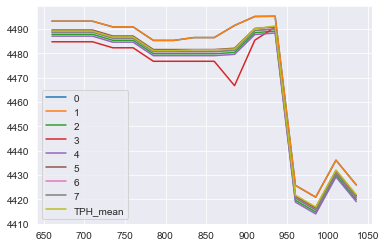

9
2021-09-15 03:09:00


,0,1,2,3,4,5,6,7,8,TPH_mean
660,4493.231445,4493.231445,4487.864258,4484.775391,4487.086426,4489.605469,4488.750488,4488.750488,4490.631836,4489.325195
685,4493.231445,4493.231445,4487.864258,4484.775391,4487.086426,4489.605469,4488.750488,4488.750488,4490.631836,4489.325195
710,4493.231445,4493.231445,4487.864258,4484.775391,4487.086426,4489.605469,4488.750488,4488.750488,4490.631836,4489.325195
735,4490.886230,4490.886230,4485.394531,4482.305664,4484.616699,4487.135742,4486.280762,4486.280762,4488.162109,4486.883789
760,4490.886230,4490.886230,4485.394531,4482.305664,4484.616699,4487.135742,4486.280762,4486.280762,4488.162109,4486.883789
785,4485.333008,4485.333008,4479.841309,4476.752441,4479.063477,4481.582520,4480.727539,4480.727539,4474.598633,4480.439453
810,4485.333008,4485.333008,4479.841309,4476.752441,4479.063477,4481.582520,4480.727539,4480.727539,4480.337891,4481.077148
835,4486.504395,4486.504395,4479.841309,4476.752441,4479.063477,4481.582520,4480.727539,4480.727539,4480.337891,4481.337891
860,4486.504395,4486.504395,4479.841309,4476.752441,4479.063477,4481.582520,4480.727539,4480.727539,4480.337891,4481.337891
885,4491.474609,4491.474609,4480.378418,4466.732422,4479.600586,4482.119629,4481.264648,4481.264648,4480.875000,4481.687012


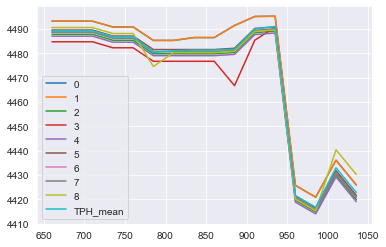

10
2021-09-15 03:10:00


,0,1,2,3,4,5,6,7,8,9,TPH_mean
660,4493.231445,4493.231445,4487.864258,4484.775391,4487.086426,4489.605469,4488.750488,4488.750488,4490.631836,4489.528320,4489.345215
685,4493.231445,4493.231445,4487.864258,4484.775391,4487.086426,4489.605469,4488.750488,4488.750488,4490.631836,4489.528320,4489.345215
710,4493.231445,4493.231445,4487.864258,4484.775391,4487.086426,4489.605469,4488.750488,4488.750488,4490.631836,4489.528320,4489.345215
735,4490.886230,4490.886230,4485.394531,4482.305664,4484.616699,4487.135742,4486.280762,4486.280762,4488.162109,4487.058594,4486.901367
760,4490.886230,4490.886230,4485.394531,4482.305664,4484.616699,4487.135742,4486.280762,4486.280762,4488.162109,4487.058594,4486.901367
785,4485.333008,4485.333008,4479.841309,4476.752441,4479.063477,4481.582520,4480.727539,4480.727539,4474.598633,4481.505371,4480.545898
810,4485.333008,4485.333008,4479.841309,4476.752441,4479.063477,4481.582520,4480.727539,4480.727539,4480.337891,4481.505371,4481.120117
835,4486.504395,4486.504395,4479.841309,4476.752441,4479.063477,4481.582520,4480.727539,4480.727539,4480.337891,4481.505371,4481.354492
860,4486.504395,4486.504395,4479.841309,4476.752441,4479.063477,4481.582520,4480.727539,4480.727539,4480.337891,4481.505371,4481.354492
885,4491.474609,4491.474609,4480.378418,4466.732422,4479.600586,4482.119629,4481.264648,4481.264648,4480.875000,4482.042480,4481.722656


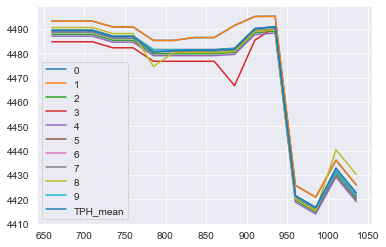

11
2021-09-15 03:11:00


,1,2,3,4,5,6,7,8,9,10,TPH_mean
660,4493.231445,4487.864258,4484.775391,4487.086426,4489.605469,4488.750488,4488.750488,4490.631836,4489.528320,4489.789062,4489.000977
685,4493.231445,4487.864258,4484.775391,4487.086426,4489.605469,4488.750488,4488.750488,4490.631836,4489.528320,4489.789062,4489.000977
710,4493.231445,4487.864258,4484.775391,4487.086426,4489.605469,4488.750488,4488.750488,4490.631836,4489.528320,4489.789062,4489.000977
735,4490.886230,4485.394531,4482.305664,4484.616699,4487.135742,4486.280762,4486.280762,4488.162109,4487.058594,4487.319336,4486.543945
760,4490.886230,4485.394531,4482.305664,4484.616699,4487.135742,4486.280762,4486.280762,4488.162109,4487.058594,4487.319336,4486.543945
785,4485.333008,4479.841309,4476.752441,4479.063477,4481.582520,4480.727539,4480.727539,4474.598633,4481.505371,4481.766113,4480.188965
810,4485.333008,4479.841309,4476.752441,4479.063477,4481.582520,4480.727539,4480.727539,4480.337891,4481.505371,4481.766113,4480.762695
835,4486.504395,4479.841309,4476.752441,4479.063477,4481.582520,4480.727539,4480.727539,4480.337891,4481.505371,4481.766113,4480.879883
860,4486.504395,4479.841309,4476.752441,4479.063477,4481.582520,4480.727539,4480.727539,4480.337891,4481.505371,4481.766113,4480.879883
885,4491.474609,4480.378418,4466.732422,4479.600586,4482.119629,4481.264648,4481.264648,4480.875000,4482.042480,4482.303223,4480.805664


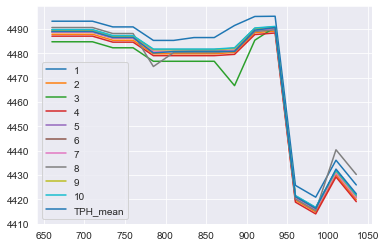

12
2021-09-15 03:12:00


,2,3,4,5,6,7,8,9,10,11,TPH_mean
660,4487.864258,4484.775391,4487.086426,4489.605469,4488.750488,4488.750488,4490.631836,4489.528320,4489.789062,4489.528320,4488.630859
685,4487.864258,4484.775391,4487.086426,4489.605469,4488.750488,4488.750488,4490.631836,4489.528320,4489.789062,4489.528320,4488.630859
710,4487.864258,4484.775391,4487.086426,4489.605469,4488.750488,4488.750488,4490.631836,4489.528320,4489.789062,4489.528320,4488.630859
735,4485.394531,4482.305664,4484.616699,4487.135742,4486.280762,4486.280762,4488.162109,4487.058594,4487.319336,4487.058594,4486.161133
760,4485.394531,4482.305664,4484.616699,4487.135742,4486.280762,4486.280762,4488.162109,4487.058594,4487.319336,4487.058594,4486.161133
785,4479.841309,4476.752441,4479.063477,4481.582520,4480.727539,4480.727539,4474.598633,4481.505371,4481.766113,4481.505371,4479.806641
810,4479.841309,4476.752441,4479.063477,4481.582520,4480.727539,4480.727539,4480.337891,4481.505371,4481.766113,4481.505371,4480.380859
835,4479.841309,4476.752441,4479.063477,4481.582520,4480.727539,4480.727539,4480.337891,4481.505371,4481.766113,4481.505371,4480.380859
860,4479.841309,4476.752441,4479.063477,4481.582520,4480.727539,4480.727539,4480.337891,4481.505371,4481.766113,4481.505371,4480.380859
885,4480.378418,4466.732422,4479.600586,4482.119629,4481.264648,4481.264648,4480.875000,4482.042480,4482.303223,4482.042480,4479.862793


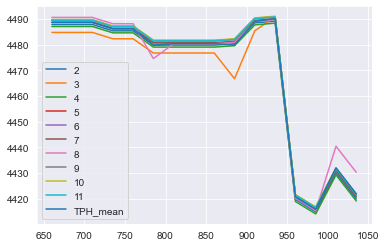

13
2021-09-15 03:13:00


,3,4,5,6,7,8,9,10,11,12,TPH_mean
660,4484.775391,4487.086426,4489.605469,4488.750488,4488.750488,4490.631836,4489.528320,4489.789062,4489.528320,4489.528320,4488.796875
685,4484.775391,4487.086426,4489.605469,4488.750488,4488.750488,4490.631836,4489.528320,4489.789062,4489.528320,4489.528320,4488.796875
710,4484.775391,4487.086426,4489.605469,4488.750488,4488.750488,4490.631836,4489.528320,4489.789062,4489.528320,4489.528320,4488.796875
735,4482.305664,4484.616699,4487.135742,4486.280762,4486.280762,4488.162109,4487.058594,4487.319336,4487.058594,4487.058594,4486.327637
760,4482.305664,4484.616699,4487.135742,4486.280762,4486.280762,4488.162109,4487.058594,4487.319336,4487.058594,4487.058594,4486.327637
785,4476.752441,4479.063477,4481.582520,4480.727539,4480.727539,4474.598633,4481.505371,4481.766113,4481.505371,4481.505371,4479.973145
810,4476.752441,4479.063477,4481.582520,4480.727539,4480.727539,4480.337891,4481.505371,4481.766113,4481.505371,4481.505371,4480.546875
835,4476.752441,4479.063477,4481.582520,4480.727539,4480.727539,4480.337891,4481.505371,4481.766113,4481.505371,4481.505371,4480.546875
860,4476.752441,4479.063477,4481.582520,4480.727539,4480.727539,4480.337891,4481.505371,4481.766113,4481.505371,4481.505371,4480.546875
885,4466.732422,4479.600586,4482.119629,4481.264648,4481.264648,4480.875000,4482.042480,4482.303223,4482.042480,4482.042480,4480.029297


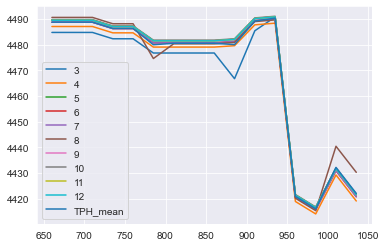

14
2021-09-15 03:14:00


,4,5,6,7,8,9,10,11,12,13,TPH_mean
660,4487.086426,4489.605469,4488.750488,4488.750488,4490.631836,4489.528320,4489.789062,4489.528320,4489.528320,4489.528320,4489.272461
685,4487.086426,4489.605469,4488.750488,4488.750488,4490.631836,4489.528320,4489.789062,4489.528320,4489.528320,4489.528320,4489.272461
710,4487.086426,4489.605469,4488.750488,4488.750488,4490.631836,4489.528320,4489.789062,4489.528320,4489.528320,4489.528320,4489.272461
735,4484.616699,4487.135742,4486.280762,4486.280762,4488.162109,4487.058594,4487.319336,4487.058594,4487.058594,4487.058594,4486.803223
760,4484.616699,4487.135742,4486.280762,4486.280762,4488.162109,4487.058594,4487.319336,4487.058594,4487.058594,4487.058594,4486.803223
785,4479.063477,4481.582520,4480.727539,4480.727539,4474.598633,4481.505371,4481.766113,4481.505371,4481.505371,4481.505371,4480.448242
810,4479.063477,4481.582520,4480.727539,4480.727539,4480.337891,4481.505371,4481.766113,4481.505371,4481.505371,4481.505371,4481.022461
835,4479.063477,4481.582520,4480.727539,4480.727539,4480.337891,4481.505371,4481.766113,4481.505371,4481.505371,4481.505371,4481.022461
860,4479.063477,4481.582520,4480.727539,4480.727539,4480.337891,4481.505371,4481.766113,4481.505371,4481.505371,4481.505371,4481.022461
885,4479.600586,4482.119629,4481.264648,4481.264648,4480.875000,4482.042480,4482.303223,4482.042480,4482.042480,4482.042480,4481.559570


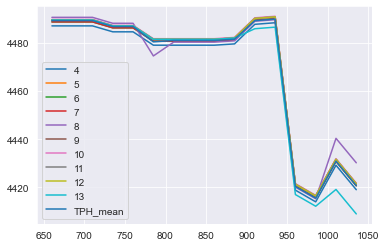

15
2021-09-15 03:15:00


,5,6,7,8,9,10,11,12,13,14,TPH_mean
660,4489.605469,4488.750488,4488.750488,4490.631836,4489.528320,4489.789062,4489.528320,4489.528320,4489.528320,4489.528320,4489.516602
685,4489.605469,4488.750488,4488.750488,4490.631836,4489.528320,4489.789062,4489.528320,4489.528320,4489.528320,4489.528320,4489.516602
710,4489.605469,4488.750488,4488.750488,4490.631836,4489.528320,4489.789062,4489.528320,4489.528320,4489.528320,4489.528320,4489.516602
735,4487.135742,4486.280762,4486.280762,4488.162109,4487.058594,4487.319336,4487.058594,4487.058594,4487.058594,4487.058594,4487.047363
760,4487.135742,4486.280762,4486.280762,4488.162109,4487.058594,4487.319336,4487.058594,4487.058594,4487.058594,4487.058594,4487.047363
785,4481.582520,4480.727539,4480.727539,4474.598633,4481.505371,4481.766113,4481.505371,4481.505371,4481.505371,4481.505371,4480.692383
810,4481.582520,4480.727539,4480.727539,4480.337891,4481.505371,4481.766113,4481.505371,4481.505371,4481.505371,4481.505371,4481.266602
835,4481.582520,4480.727539,4480.727539,4480.337891,4481.505371,4481.766113,4481.505371,4481.505371,4481.505371,4481.505371,4481.266602
860,4481.582520,4480.727539,4480.727539,4480.337891,4481.505371,4481.766113,4481.505371,4481.505371,4481.505371,4481.505371,4481.266602
885,4482.119629,4481.264648,4481.264648,4480.875000,4482.042480,4482.303223,4482.042480,4482.042480,4482.042480,4482.042480,4481.803711


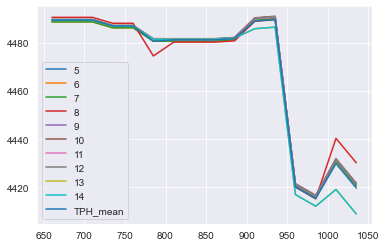

16
2021-09-15 03:16:00


,6,7,8,9,10,11,12,13,14,15,TPH_mean
660,4488.750488,4488.750488,4490.631836,4489.528320,4489.789062,4489.528320,4489.528320,4489.528320,4489.528320,4489.789062,4489.534668
685,4488.750488,4488.750488,4490.631836,4489.528320,4489.789062,4489.528320,4489.528320,4489.528320,4489.528320,4489.789062,4489.534668
710,4488.750488,4488.750488,4490.631836,4489.528320,4489.789062,4489.528320,4489.528320,4489.528320,4489.528320,4489.789062,4489.534668
735,4486.280762,4486.280762,4488.162109,4487.058594,4487.319336,4487.058594,4487.058594,4487.058594,4487.058594,4487.319336,4487.065430
760,4486.280762,4486.280762,4488.162109,4487.058594,4487.319336,4487.058594,4487.058594,4487.058594,4487.058594,4487.319336,4487.065430
785,4480.727539,4480.727539,4474.598633,4481.505371,4481.766113,4481.505371,4481.505371,4481.505371,4481.505371,4481.766113,4480.710938
810,4480.727539,4480.727539,4480.337891,4481.505371,4481.766113,4481.505371,4481.505371,4481.505371,4481.505371,4481.766113,4481.285156
835,4480.727539,4480.727539,4480.337891,4481.505371,4481.766113,4481.505371,4481.505371,4481.505371,4481.505371,4481.766113,4481.285156
860,4480.727539,4480.727539,4480.337891,4481.505371,4481.766113,4481.505371,4481.505371,4481.505371,4481.505371,4481.766113,4481.285156
885,4481.264648,4481.264648,4480.875000,4482.042480,4482.303223,4482.042480,4482.042480,4482.042480,4482.042480,4482.303223,4481.822754


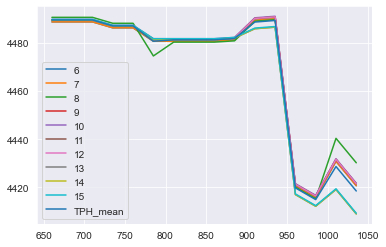

17
2021-09-15 03:17:00


,7,8,9,10,11,12,13,14,15,16,TPH_mean
660,4488.750488,4490.631836,4489.528320,4489.789062,4489.528320,4489.528320,4489.528320,4489.528320,4489.789062,4489.789062,4489.638672
685,4488.750488,4490.631836,4489.528320,4489.789062,4489.528320,4489.528320,4489.528320,4489.528320,4489.789062,4489.789062,4489.638672
710,4488.750488,4490.631836,4489.528320,4489.789062,4489.528320,4489.528320,4489.528320,4489.528320,4489.789062,4489.789062,4489.638672
735,4486.280762,4488.162109,4487.058594,4487.319336,4487.058594,4487.058594,4487.058594,4487.058594,4487.319336,4487.319336,4487.169434
760,4486.280762,4488.162109,4487.058594,4487.319336,4487.058594,4487.058594,4487.058594,4487.058594,4487.319336,4487.319336,4487.169434
785,4480.727539,4474.598633,4481.505371,4481.766113,4481.505371,4481.505371,4481.505371,4481.505371,4481.766113,4481.766113,4480.815430
810,4480.727539,4480.337891,4481.505371,4481.766113,4481.505371,4481.505371,4481.505371,4481.505371,4481.766113,4481.766113,4481.389160
835,4480.727539,4480.337891,4481.505371,4481.766113,4481.505371,4481.505371,4481.505371,4481.505371,4481.766113,4481.766113,4481.389160
860,4480.727539,4480.337891,4481.505371,4481.766113,4481.505371,4481.505371,4481.505371,4481.505371,4481.766113,4481.766113,4481.389160
885,4481.264648,4480.875000,4482.042480,4482.303223,4482.042480,4482.042480,4482.042480,4482.042480,4482.303223,4482.303223,4481.926758


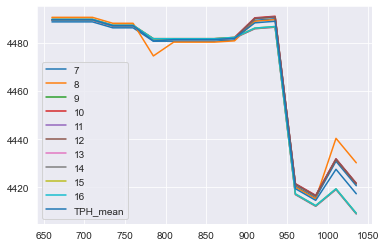

18
2021-09-15 03:18:00


,8,9,10,11,12,13,14,15,16,17,TPH_mean
660,4490.631836,4489.528320,4489.789062,4489.528320,4489.528320,4489.528320,4489.528320,4489.789062,4489.789062,4487.270020,4489.490723
685,4490.631836,4489.528320,4489.789062,4489.528320,4489.528320,4489.528320,4489.528320,4489.789062,4489.789062,4487.270020,4489.490723
710,4490.631836,4489.528320,4489.789062,4489.528320,4489.528320,4489.528320,4489.528320,4489.789062,4489.789062,4487.270020,4489.490723
735,4488.162109,4487.058594,4487.319336,4487.058594,4487.058594,4487.058594,4487.058594,4487.319336,4487.319336,4484.800293,4487.021484
760,4488.162109,4487.058594,4487.319336,4487.058594,4487.058594,4487.058594,4487.058594,4487.319336,4487.319336,4484.800293,4487.021484
785,4474.598633,4481.505371,4481.766113,4481.505371,4481.505371,4481.505371,4481.505371,4481.766113,4481.766113,4479.247070,4480.666992
810,4480.337891,4481.505371,4481.766113,4481.505371,4481.505371,4481.505371,4481.505371,4481.766113,4481.766113,4479.247070,4481.241211
835,4480.337891,4481.505371,4481.766113,4481.505371,4481.505371,4481.505371,4481.505371,4481.766113,4481.766113,4479.247070,4481.241211
860,4480.337891,4481.505371,4481.766113,4481.505371,4481.505371,4481.505371,4481.505371,4481.766113,4481.766113,4479.247070,4481.241211
885,4480.875000,4482.042480,4482.303223,4482.042480,4482.042480,4482.042480,4482.042480,4482.303223,4482.303223,4479.784180,4481.778320


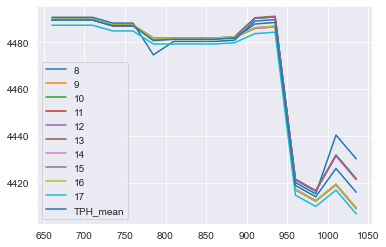

19
2021-09-15 03:19:00


,9,10,11,12,13,14,15,16,17,18,TPH_mean
660,4489.528320,4489.789062,4489.528320,4489.528320,4489.528320,4489.528320,4489.789062,4489.789062,4487.270020,4487.270020,4489.154785
685,4489.528320,4489.789062,4489.528320,4489.528320,4489.528320,4489.528320,4489.789062,4489.789062,4487.270020,4487.270020,4489.154785
710,4489.528320,4489.789062,4489.528320,4489.528320,4489.528320,4489.528320,4489.789062,4489.789062,4487.270020,4487.270020,4489.154785
735,4487.058594,4487.319336,4487.058594,4487.058594,4487.058594,4487.058594,4487.319336,4487.319336,4484.800293,4484.800293,4486.685547
760,4487.058594,4487.319336,4487.058594,4487.058594,4487.058594,4487.058594,4487.319336,4487.319336,4484.800293,4484.800293,4486.685547
785,4481.505371,4481.766113,4481.505371,4481.505371,4481.505371,4481.505371,4481.766113,4481.766113,4479.247070,4479.247070,4481.131836
810,4481.505371,4481.766113,4481.505371,4481.505371,4481.505371,4481.505371,4481.766113,4481.766113,4479.247070,4479.247070,4481.131836
835,4481.505371,4481.766113,4481.505371,4481.505371,4481.505371,4481.505371,4481.766113,4481.766113,4479.247070,4479.247070,4481.131836
860,4481.505371,4481.766113,4481.505371,4481.505371,4481.505371,4481.505371,4481.766113,4481.766113,4479.247070,4479.247070,4481.131836
885,4482.042480,4482.303223,4482.042480,4482.042480,4482.042480,4482.042480,4482.303223,4482.303223,4479.784180,4479.784180,4481.669434


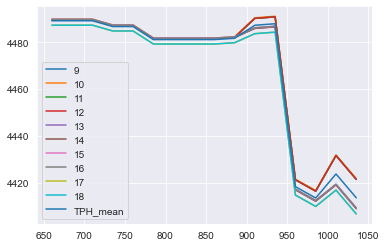

20
2021-09-15 03:20:00


,10,11,12,13,14,15,16,17,18,19,TPH_mean
660,4489.789062,4489.528320,4489.528320,4489.528320,4489.528320,4489.789062,4489.789062,4487.270020,4487.270020,4489.011230,4489.103027
685,4489.789062,4489.528320,4489.528320,4489.528320,4489.528320,4489.789062,4489.789062,4487.270020,4487.270020,4489.011230,4489.103027
710,4489.789062,4489.528320,4489.528320,4489.528320,4489.528320,4489.789062,4489.789062,4487.270020,4487.270020,4489.011230,4489.103027
735,4487.319336,4487.058594,4487.058594,4487.058594,4487.058594,4487.319336,4487.319336,4484.800293,4484.800293,4486.541504,4486.633789
760,4487.319336,4487.058594,4487.058594,4487.058594,4487.058594,4487.319336,4487.319336,4484.800293,4484.800293,4486.541504,4486.633789
785,4481.766113,4481.505371,4481.505371,4481.505371,4481.505371,4481.766113,4481.766113,4479.247070,4479.247070,4480.988281,4481.080078
810,4481.766113,4481.505371,4481.505371,4481.505371,4481.505371,4481.766113,4481.766113,4479.247070,4479.247070,4480.988281,4481.080078
835,4481.766113,4481.505371,4481.505371,4481.505371,4481.505371,4481.766113,4481.766113,4479.247070,4479.247070,4480.988281,4481.080078
860,4481.766113,4481.505371,4481.505371,4481.505371,4481.505371,4481.766113,4481.766113,4479.247070,4479.247070,4480.988281,4481.080078
885,4482.303223,4482.042480,4482.042480,4482.042480,4482.042480,4482.303223,4482.303223,4479.784180,4479.784180,4481.525391,4481.617188


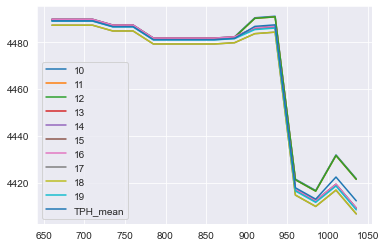

21
2021-09-15 03:21:00


,11,12,13,14,15,16,17,18,19,20,TPH_mean
660,4489.528320,4489.528320,4489.528320,4489.528320,4489.789062,4489.789062,4487.270020,4487.270020,4489.011230,4488.147461,4488.938965
685,4489.528320,4489.528320,4489.528320,4489.528320,4489.789062,4489.789062,4487.270020,4487.270020,4489.011230,4488.147461,4488.938965
710,4489.528320,4489.528320,4489.528320,4489.528320,4489.789062,4489.789062,4487.270020,4487.270020,4489.011230,4488.147461,4488.938965
735,4487.058594,4487.058594,4487.058594,4487.058594,4487.319336,4487.319336,4484.800293,4484.800293,4486.541504,4485.677734,4486.469727
760,4487.058594,4487.058594,4487.058594,4487.058594,4487.319336,4487.319336,4484.800293,4484.800293,4486.541504,4485.677734,4486.469727
785,4481.505371,4481.505371,4481.505371,4481.505371,4481.766113,4481.766113,4479.247070,4479.247070,4480.988281,4480.124512,4480.916016
810,4481.505371,4481.505371,4481.505371,4481.505371,4481.766113,4481.766113,4479.247070,4479.247070,4480.988281,4480.124512,4480.916016
835,4481.505371,4481.505371,4481.505371,4481.505371,4481.766113,4481.766113,4479.247070,4479.247070,4480.988281,4480.124512,4480.916016
860,4481.505371,4481.505371,4481.505371,4481.505371,4481.766113,4481.766113,4479.247070,4479.247070,4480.988281,4480.124512,4480.916016
885,4482.042480,4482.042480,4482.042480,4482.042480,4482.303223,4482.303223,4479.784180,4479.784180,4481.525391,4480.661621,4481.452637


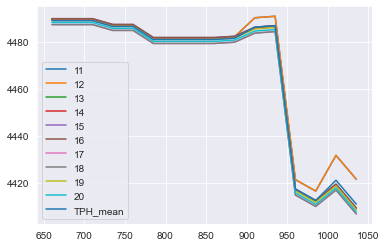

22
2021-09-15 03:22:00


,12,13,14,15,16,17,18,19,20,21,TPH_mean
660,4489.528320,4489.528320,4489.528320,4489.789062,4489.789062,4487.270020,4487.270020,4489.011230,4488.147461,4486.420898,4488.628418
685,4489.528320,4489.528320,4489.528320,4489.789062,4489.789062,4487.270020,4487.270020,4489.011230,4488.147461,4486.420898,4488.628418
710,4489.528320,4489.528320,4489.528320,4489.789062,4489.789062,4487.270020,4487.270020,4489.011230,4488.147461,4486.420898,4488.628418
735,4487.058594,4487.058594,4487.058594,4487.319336,4487.319336,4484.800293,4484.800293,4486.541504,4485.677734,4483.951172,4486.159180
760,4487.058594,4487.058594,4487.058594,4487.319336,4487.319336,4484.800293,4484.800293,4486.541504,4485.677734,4483.951172,4486.159180
785,4481.505371,4481.505371,4481.505371,4481.766113,4481.766113,4479.247070,4479.247070,4480.988281,4480.124512,4478.397949,4480.604980
810,4481.505371,4481.505371,4481.505371,4481.766113,4481.766113,4479.247070,4479.247070,4480.988281,4480.124512,4478.397949,4480.604980
835,4481.505371,4481.505371,4481.505371,4481.766113,4481.766113,4479.247070,4479.247070,4480.988281,4480.124512,4478.397949,4480.604980
860,4481.505371,4481.505371,4481.505371,4481.766113,4481.766113,4479.247070,4479.247070,4480.988281,4480.124512,4478.397949,4480.604980
885,4482.042480,4482.042480,4482.042480,4482.303223,4482.303223,4479.784180,4479.784180,4481.525391,4480.661621,4478.935059,4481.142090


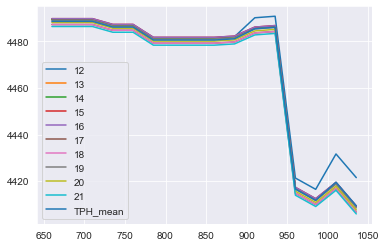

23
2021-09-15 03:23:00


,13,14,15,16,17,18,19,20,21,22,TPH_mean
660,4489.528320,4489.528320,4489.789062,4489.789062,4487.270020,4487.270020,4489.011230,4488.147461,4486.420898,4474.187988,4487.094238
685,4489.528320,4489.528320,4489.789062,4489.789062,4487.270020,4487.270020,4489.011230,4488.147461,4486.420898,4474.187988,4487.094238
710,4489.528320,4489.528320,4489.789062,4489.789062,4487.270020,4487.270020,4489.011230,4488.147461,4486.420898,4474.187988,4487.094238
735,4487.058594,4487.058594,4487.319336,4487.319336,4484.800293,4484.800293,4486.541504,4485.677734,4483.951172,4468.936035,4484.346680
760,4487.058594,4487.058594,4487.319336,4487.319336,4484.800293,4484.800293,4486.541504,4485.677734,4483.951172,4468.936035,4484.346680
785,4481.505371,4481.505371,4481.766113,4481.766113,4479.247070,4479.247070,4480.988281,4480.124512,4478.397949,4463.382812,4478.792969
810,4481.505371,4481.505371,4481.766113,4481.766113,4479.247070,4479.247070,4480.988281,4480.124512,4478.397949,4463.382812,4478.792969
835,4481.505371,4481.505371,4481.766113,4481.766113,4479.247070,4479.247070,4480.988281,4480.124512,4478.397949,4463.382812,4478.792969
860,4481.505371,4481.505371,4481.766113,4481.766113,4479.247070,4479.247070,4480.988281,4480.124512,4478.397949,4463.382812,4478.792969
885,4482.042480,4482.042480,4482.303223,4482.303223,4479.784180,4479.784180,4481.525391,4480.661621,4478.935059,4463.919922,4479.330566


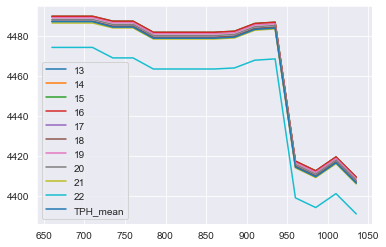

24
2021-09-15 03:24:00


,14,15,16,17,18,19,20,21,22,23,TPH_mean
660,4489.528320,4489.789062,4489.789062,4487.270020,4487.270020,4489.011230,4488.147461,4486.420898,4474.187988,4442.299316,4482.371582
685,4489.528320,4489.789062,4489.789062,4487.270020,4487.270020,4489.011230,4488.147461,4486.420898,4474.187988,4442.299316,4482.371582
710,4489.528320,4489.789062,4489.789062,4487.270020,4487.270020,4489.011230,4488.147461,4486.420898,4474.187988,4442.299316,4482.371582
735,4487.058594,4487.319336,4487.319336,4484.800293,4484.800293,4486.541504,4485.677734,4483.951172,4468.936035,4433.633789,4479.003906
760,4487.058594,4487.319336,4487.319336,4484.800293,4484.800293,4486.541504,4485.677734,4483.951172,4468.936035,4433.633789,4479.003906
785,4481.505371,4481.766113,4481.766113,4479.247070,4479.247070,4480.988281,4480.124512,4478.397949,4463.382812,4428.080566,4473.450684
810,4481.505371,4481.766113,4481.766113,4479.247070,4479.247070,4480.988281,4480.124512,4478.397949,4463.382812,4428.080566,4473.450684
835,4481.505371,4481.766113,4481.766113,4479.247070,4479.247070,4480.988281,4480.124512,4478.397949,4463.382812,4428.080566,4473.450684
860,4481.505371,4481.766113,4481.766113,4479.247070,4479.247070,4480.988281,4480.124512,4478.397949,4463.382812,4414.958496,4472.138184
885,4482.042480,4482.303223,4482.303223,4479.784180,4479.784180,4481.525391,4480.661621,4478.935059,4463.919922,4417.124512,4472.838379


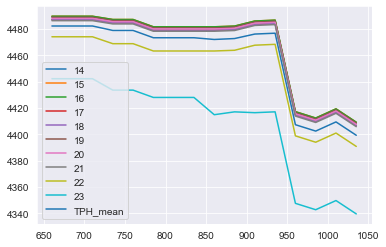

25
2021-09-15 03:25:00


,15,16,17,18,19,20,21,22,23,24,TPH_mean
660,4489.789062,4489.789062,4487.270020,4487.270020,4489.011230,4488.147461,4486.420898,4474.187988,4442.299316,4427.002441,4476.119141
685,4489.789062,4489.789062,4487.270020,4487.270020,4489.011230,4488.147461,4486.420898,4474.187988,4442.299316,4427.002441,4476.119141
710,4489.789062,4489.789062,4487.270020,4487.270020,4489.011230,4488.147461,4486.420898,4474.187988,4442.299316,4427.002441,4476.119141
735,4487.319336,4487.319336,4484.800293,4484.800293,4486.541504,4485.677734,4483.951172,4468.936035,4433.633789,4418.336914,4472.131836
760,4487.319336,4487.319336,4484.800293,4484.800293,4486.541504,4485.677734,4483.951172,4468.936035,4433.633789,4418.336914,4472.131836
785,4481.766113,4481.766113,4479.247070,4479.247070,4480.988281,4480.124512,4478.397949,4463.382812,4428.080566,4412.783691,4466.579102
810,4481.766113,4481.766113,4479.247070,4479.247070,4480.988281,4480.124512,4478.397949,4463.382812,4428.080566,4412.783691,4466.579102
835,4481.766113,4481.766113,4479.247070,4479.247070,4480.988281,4480.124512,4478.397949,4463.382812,4428.080566,4412.783691,4466.579102
860,4481.766113,4481.766113,4479.247070,4479.247070,4480.988281,4480.124512,4478.397949,4463.382812,4414.958496,4399.661621,4463.954102
885,4482.303223,4482.303223,4479.784180,4479.784180,4481.525391,4480.661621,4478.935059,4463.919922,4417.124512,4401.827637,4464.817383


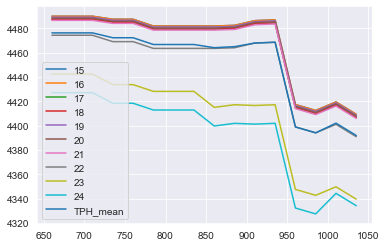

26
2021-09-15 03:26:00


,16,17,18,19,20,21,22,23,24,25,TPH_mean
660,4489.789062,4487.270020,4487.270020,4489.011230,4488.147461,4486.420898,4474.187988,4442.299316,4427.002441,4475.858887,4474.726074
685,4489.789062,4487.270020,4487.270020,4489.011230,4488.147461,4486.420898,4474.187988,4442.299316,4427.002441,4475.858887,4474.726074
710,4489.789062,4487.270020,4487.270020,4489.011230,4488.147461,4486.420898,4474.187988,4442.299316,4427.002441,4475.858887,4474.726074
735,4487.319336,4484.800293,4484.800293,4486.541504,4485.677734,4483.951172,4468.936035,4433.633789,4418.336914,4464.258301,4469.825195
760,4487.319336,4484.800293,4484.800293,4486.541504,4485.677734,4483.951172,4468.936035,4433.633789,4418.336914,4464.258301,4469.825195
785,4481.766113,4479.247070,4479.247070,4480.988281,4480.124512,4478.397949,4463.382812,4428.080566,4412.783691,4458.705078,4464.272461
810,4481.766113,4479.247070,4479.247070,4480.988281,4480.124512,4478.397949,4463.382812,4428.080566,4412.783691,4458.705078,4464.272461
835,4481.766113,4479.247070,4479.247070,4480.988281,4480.124512,4478.397949,4463.382812,4428.080566,4412.783691,4458.705078,4464.272461
860,4481.766113,4479.247070,4479.247070,4480.988281,4480.124512,4478.397949,4463.382812,4414.958496,4399.661621,4453.605957,4461.137695
885,4482.303223,4479.784180,4479.784180,4481.525391,4480.661621,4478.935059,4463.919922,4417.124512,4401.827637,4455.771973,4462.164062


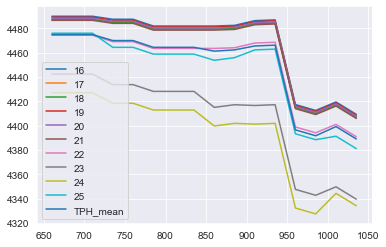

27
2021-09-15 03:27:00


,17,18,19,20,21,22,23,24,25,26,TPH_mean
660,4487.270020,4487.270020,4489.011230,4488.147461,4486.420898,4474.187988,4442.299316,4427.002441,4475.858887,4176.471680,4443.394043
685,4487.270020,4487.270020,4489.011230,4488.147461,4486.420898,4474.187988,4442.299316,4427.002441,4475.858887,4227.673828,4448.514160
710,4487.270020,4487.270020,4489.011230,4488.147461,4486.420898,4474.187988,4442.299316,4427.002441,4475.858887,4227.673828,4448.514160
735,4484.800293,4484.800293,4486.541504,4485.677734,4483.951172,4468.936035,4433.633789,4418.336914,4464.258301,4222.269043,4443.320312
760,4484.800293,4484.800293,4486.541504,4485.677734,4483.951172,4468.936035,4433.633789,4418.336914,4464.258301,4222.269043,4443.320312
785,4479.247070,4479.247070,4480.988281,4480.124512,4478.397949,4463.382812,4428.080566,4412.783691,4458.705078,4321.973145,4448.293457
810,4479.247070,4479.247070,4480.988281,4480.124512,4478.397949,4463.382812,4428.080566,4412.783691,4458.705078,4321.973145,4448.293457
835,4479.247070,4479.247070,4480.988281,4480.124512,4478.397949,4463.382812,4428.080566,4412.783691,4458.705078,4321.973145,4448.293457
860,4479.247070,4479.247070,4480.988281,4480.124512,4478.397949,4463.382812,4414.958496,4399.661621,4453.605957,4321.973145,4445.158691
885,4479.784180,4479.784180,4481.525391,4480.661621,4478.935059,4463.919922,4417.124512,4401.827637,4455.771973,4322.510254,4446.184570


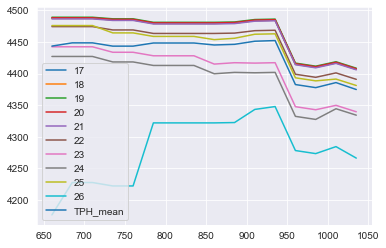

28
2021-09-15 03:28:00


,18,19,20,21,22,23,24,25,26,27,TPH_mean
660,4487.270020,4489.011230,4488.147461,4486.420898,4474.187988,4442.299316,4427.002441,4475.858887,4176.471680,4308.053223,4425.472168
685,4487.270020,4489.011230,4488.147461,4486.420898,4474.187988,4442.299316,4427.002441,4475.858887,4227.673828,4308.053223,4430.592285
710,4487.270020,4489.011230,4488.147461,4486.420898,4474.187988,4442.299316,4427.002441,4475.858887,4227.673828,4308.053223,4430.592285
735,4484.800293,4486.541504,4485.677734,4483.951172,4468.936035,4433.633789,4418.336914,4464.258301,4222.269043,4302.648438,4425.104980
760,4484.800293,4486.541504,4485.677734,4483.951172,4468.936035,4433.633789,4418.336914,4464.258301,4222.269043,4302.648438,4425.104980
785,4479.247070,4480.988281,4480.124512,4478.397949,4463.382812,4428.080566,4412.783691,4458.705078,4321.973145,4402.352539,4440.603516
810,4479.247070,4480.988281,4480.124512,4478.397949,4463.382812,4428.080566,4412.783691,4458.705078,4321.973145,4402.352539,4440.603516
835,4479.247070,4480.988281,4480.124512,4478.397949,4463.382812,4428.080566,4412.783691,4458.705078,4321.973145,4402.352539,4440.603516
860,4479.247070,4480.988281,4480.124512,4478.397949,4463.382812,4414.958496,4399.661621,4453.605957,4321.973145,4402.352539,4437.469238
885,4479.784180,4481.525391,4480.661621,4478.935059,4463.919922,4417.124512,4401.827637,4455.771973,4322.510254,4402.889648,4438.495117


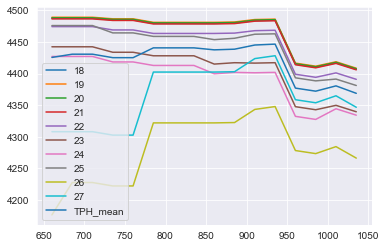

29
2021-09-15 03:29:00


,19,20,21,22,23,24,25,26,27,28,TPH_mean
660,4489.011230,4488.147461,4486.420898,4474.187988,4442.299316,4427.002441,4475.858887,4176.471680,4308.053223,4442.395508,4420.984863
685,4489.011230,4488.147461,4486.420898,4474.187988,4442.299316,4427.002441,4475.858887,4227.673828,4308.053223,4493.597656,4431.225586
710,4489.011230,4488.147461,4486.420898,4474.187988,4442.299316,4427.002441,4475.858887,4227.673828,4308.053223,4493.597656,4431.225586
735,4486.541504,4485.677734,4483.951172,4468.936035,4433.633789,4418.336914,4464.258301,4222.269043,4302.648438,4488.192871,4425.444336
760,4486.541504,4485.677734,4483.951172,4468.936035,4433.633789,4418.336914,4464.258301,4222.269043,4302.648438,4484.458496,4425.070801
785,4480.988281,4480.124512,4478.397949,4463.382812,4428.080566,4412.783691,4458.705078,4321.973145,4402.352539,4478.905273,4440.569336
810,4480.988281,4480.124512,4478.397949,4463.382812,4428.080566,4412.783691,4458.705078,4321.973145,4402.352539,4478.905273,4440.569336
835,4480.988281,4480.124512,4478.397949,4463.382812,4428.080566,4412.783691,4458.705078,4321.973145,4402.352539,4478.905273,4440.569336
860,4480.988281,4480.124512,4478.397949,4463.382812,4414.958496,4399.661621,4453.605957,4321.973145,4402.352539,4478.905273,4437.435059
885,4481.525391,4480.661621,4478.935059,4463.919922,4417.124512,4401.827637,4455.771973,4322.510254,4402.889648,4479.442383,4438.460938


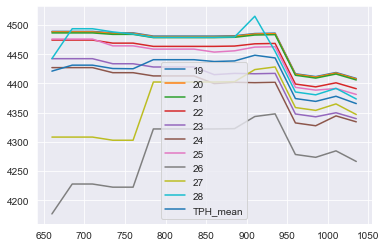

30
2021-09-15 03:30:00


,20,21,22,23,24,25,26,27,28,29,TPH_mean
660,4488.147461,4486.420898,4474.187988,4442.299316,4427.002441,4475.858887,4176.471680,4308.053223,4442.395508,4110.077148,4383.091309
685,4488.147461,4486.420898,4474.187988,4442.299316,4427.002441,4475.858887,4227.673828,4308.053223,4493.597656,4161.279297,4398.452148
710,4488.147461,4486.420898,4474.187988,4442.299316,4427.002441,4475.858887,4227.673828,4308.053223,4493.597656,4161.279297,4398.452148
735,4485.677734,4483.951172,4468.936035,4433.633789,4418.336914,4464.258301,4222.269043,4302.648438,4488.192871,4276.898438,4404.479980
760,4485.677734,4483.951172,4468.936035,4433.633789,4418.336914,4464.258301,4222.269043,4302.648438,4484.458496,4276.898438,4404.106445
785,4480.124512,4478.397949,4463.382812,4428.080566,4412.783691,4458.705078,4321.973145,4402.352539,4478.905273,4333.146484,4425.785156
810,4480.124512,4478.397949,4463.382812,4428.080566,4412.783691,4458.705078,4321.973145,4402.352539,4478.905273,4333.146484,4425.785156
835,4480.124512,4478.397949,4463.382812,4428.080566,4412.783691,4458.705078,4321.973145,4402.352539,4478.905273,4333.146484,4425.785156
860,4480.124512,4478.397949,4463.382812,4414.958496,4399.661621,4453.605957,4321.973145,4402.352539,4478.905273,4333.146484,4422.650879
885,4480.661621,4478.935059,4463.919922,4417.124512,4401.827637,4455.771973,4322.510254,4402.889648,4479.442383,4326.090332,4422.916992


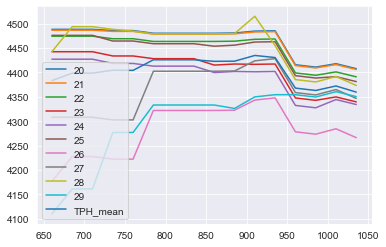

In [140]:
df_grinding_curve=pd.DataFrame(index=range_hh_cc)
list_df_recommendation=[]
list_df_tph=[]
list_index=[]
k=0
for i in timestamps:
    
    try:

        inicio=i-timedelta(minutes=10)
        fin=i
        print(k)
        print(fin)

        df=data1.loc[inicio:fin]
        #display(df)
        Ytph=grinding_curve_minute(df,range_hh_cc)
        df_grinding_curve[k]=Ytph
        
        #list_df_recommendation.append(rec)
        #list_df_tph.append(tph)

        # index de recomendación
        list_index.append(fin)
    
        # Curva de molienda promedio de ultimos 10 minutos
        if k>=10:
            col_init=k-10
        else:
            col_init=0

        df_view=df_grinding_curve.iloc[:,col_init:k]
        
        df_view["TPH_mean"]=df_view.mean(axis=1)
        display(df_view)
        df_view.plot()
        plt.show()
        k=k+1
        
    except Exception as e:
        
        print(e)
        #print("Error :",i)
        #display(df)
    #break

In [ ]:
df_rec=pd.DataFrame({"Timestamp":list_index,"recommended HH charge cell":list_df_recommendation,"TPH optimum":list_df_tph}).set_index("Timestamp")
#min_rec=df_rec["recommended HH charge cell"].quantile(0.25)
#max_rec=df_rec["recommended HH charge cell"].quantile(0.75)
#df_rec["soft recommended HH charge cell"]=df_rec.apply(lambda x: x["recommended HH charge cell"] if (x["recommended HH charge cell"]>=min_rec) and (x["recommended HH charge cell"]<=max_rec) else np.nan,axis=1).interpolate()
#df_rec["soft recommended HH charge cell"]=df_rec["soft recommended HH charge cell"].rolling(window=10,min_periods=1).apply(np.nanmean)
df_rec

In [ ]:
df_rec.to_csv("recommendation ML model.csv")

In [ ]:
df_visualization=data1.merge(df_rec, left_index=True, right_index=True,how='left',suffixes=('_x', '_y'))
#df_visualization["recommended HH charge cell"]=df_visualization["recommended HH charge cell"].rolling(window=10,min_periods=1).apply(np.nanmean)
df_visualization.head()

In [ ]:
titulos=tuple(["TPH & HH TPH","speed", "charge cell","solid percentage","granulometry & SPI","water"])
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=titulos,
    #subplot_titles=tuple("TPH y HH TPH,"),
     shared_xaxes=True
    )


fig.add_trace(go.Scatter(x=df_visualization.index, y=df_visualization["TPH optimum"],
                    mode='lines',
                    name='TPH predict opt'),row=1, col=1)

fig.add_trace(go.Scatter(x=df_visualization.index, y=df_visualization["TPH predict"],
                    mode='lines',
                    name='TPH predict'),row=1, col=1)
fig.add_trace(go.Scatter(x=df_visualization.index, y=df_visualization["HH TPH"],
                    mode='lines',
                    name='HH TPH'),row=1, col=1)

fig.add_trace(go.Scatter(x=df_visualization.index, y=df_visualization["TPH"],
                    mode='lines',
                    name='TPH'),row=1, col=1)

##
fig.add_trace(go.Scatter(x=df_visualization.index, y=df_visualization["HH charge cell"],
                    mode='lines',
                    name='HH charge cell'),row=2, col=1)

fig.add_trace(go.Scatter(x=df_visualization.index, y=df_visualization['recommendation base model acn'],
                    mode='lines',
                    name='recommendation base model acn'),row=2, col=1)

fig.add_trace(go.Scatter(x=df_visualization.index, y=df_visualization['recommendation base model carl'],
                    mode='lines',
                    name='recommendation base model carl'),row=2, col=1)


fig.add_trace(go.Scatter(x=df_visualization.index, y=df_visualization["recommended HH charge cell"],
                    mode='lines',
                    name='recommended HH charge cell ML model'),row=2, col=1)

fig.add_trace(go.Scatter(x=df_visualization.index, y=df_visualization["recommended HH charge cell"]-80,
                    mode='lines',
                    name='recommended LL charge cell ML model'),row=2, col=1)

fig.add_trace(go.Scatter(x=df_visualization.index, y=df_visualization["LL charge cell"],
                    mode='lines',
                    name='LL charge cell'),row=2, col=1)

fig.add_trace(go.Scatter(x=df_visualization.index, y=df_visualization["charge cell"],
                    mode='lines',
                    name='charge cell'),row=2, col=1)   

fig.add_trace(go.Scatter(x=df_visualization.index, y=df_visualization['granulometry'], ##FF6511
                    mode='lines',
                    name='granulometry',line=dict(width=3,),legendgroup = '1'),row=3, col=1)  


fig.add_trace(go.Scatter(x=df_visualization.index, y=df_visualization['sag power index'], ##FF6511
                    mode='lines',
                    name="sag power index",line=dict(width=3, ),legendgroup = '1'),row=3, col=1)  



fig.add_trace(go.Scatter(x=df_visualization.index, y=df_visualization['speed'], ##FF6511
                    mode='lines',
                    name="speed",line=dict(width=3, ),legendgroup = '1'),row=1, col=2)  

fig.add_trace(go.Scatter(x=df_visualization.index, y=df_visualization['solid percentage'], ##FF6511
                    mode='lines',
                    name='solid percentage',line=dict(width=3, ),legendgroup = '1'),row=2, col=2)  

fig.add_trace(go.Scatter(x=df_visualization.index, y=df_visualization['water'], ##FF6511
                    mode='lines',
                    name='water',line=dict(width=3, ),legendgroup = '1'),row=3, col=2)  
#for i in range(1,6):
#   for j in range(1,4):
#        fig.update_xaxes(tickformat="%H:%M",row=i, col=j)


fig.update_layout(height=1000, width=1700, title_text="Temporal signal analysis")
fig.update_layout(hovermode="x unified")
#

fig.show()